In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import copy

from sklearn.model_selection import train_test_split

from hmmlearn import hmm

np.random.seed(46)

In [2]:
# Read ECG dataset
# normal sinus rhythm (NSR)
from os import listdir
datapath_NSR = 'dataset/MLII/1 NSR' 
# Atrial fibrillation (AFib)
datapath_AFib = 'dataset/MLII/4 AFIB'

files_NSR = [f for f in listdir(datapath_NSR)]
files_AFib = [f for f in listdir(datapath_AFib)]

NSR_train, NSR_test = train_test_split(
    files_NSR, test_size = 0.3)

# AFib_train, AFib_test = train_test_split(
#    files_AFib, test_size = 0.3)
AFib_test = files_AFib


data_NSR_train = sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0]
data_NSR_train_len = [len(data_NSR_train)]

# useful parameters
sample_len = len(data_NSR_train)
nSamplesNSR = len(NSR_train) + 1
nSamplesNSRTest = len(NSR_test) + 1
nSamplesAFib = len(AFib_test) + 1

for file in NSR_train:
    data_file = sio.loadmat(datapath_NSR + '/' + file)['val'][0]
    data_NSR_train = np.concatenate([data_NSR_train, data_file])
    data_NSR_train_len.append(len(data_file))

data_NSR_test = sio.loadmat(datapath_NSR + '/' + NSR_test[0])['val'][0]
data_NSR_test_len = [len(data_NSR_test)]
for file in NSR_test:
    data_file = sio.loadmat(datapath_NSR + '/' + file)['val'][0]
    data_NSR_test = np.concatenate([data_NSR_test, data_file])
    data_NSR_test_len.append(len(data_file))
    
data_AFib_test = sio.loadmat(datapath_AFib + '/' + AFib_test[0])['val'][0]
data_AFib_test_len = [len(data_AFib_test)]
for file in AFib_test:
    data_file = sio.loadmat(datapath_AFib + '/' + file)['val'][0]
    data_AFib_test = np.concatenate([data_AFib_test, data_file])
    data_AFib_test_len.append(len(data_file))

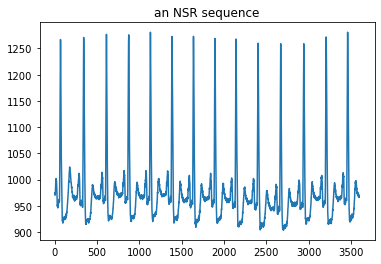

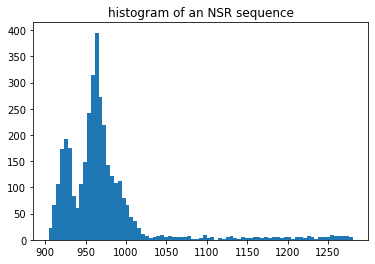

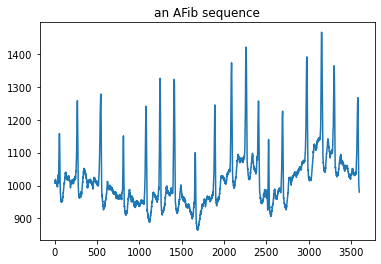

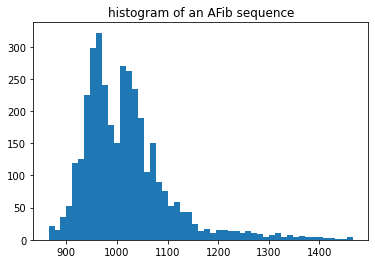

In [3]:
# graph some sample sequences
# normal
i = 24
data_plt = data_NSR_train[i * sample_len 
                          : (i + 1) * sample_len]
plt.plot(data_plt)
plt.title('an NSR sequence')
plt.show()
plt.hist(data_plt, bins = 'auto')
plt.title('histogram of an NSR sequence')
plt.show()
# anomaly
data_plt = data_AFib_test[i * sample_len
                          : (i + 1) * sample_len]
plt.plot(data_plt)
plt.title('an AFib sequence')
plt.show()
plt.hist(data_plt, bins = 'auto')
plt.title('histogram of an AFib sequence')
plt.show()

In [4]:
# 零均值化
NSR_train_reduced = copy.deepcopy(data_NSR_train)
for i in range(len(NSR_train) + 1):
    data = NSR_train_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        NSR_train_reduced[start_id + j] = NSR_train_reduced[start_id + j] - std_point

NSR_test_reduced = copy.deepcopy(data_NSR_test)
for i in range(len(NSR_test) + 1):
    data = NSR_test_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        NSR_test_reduced[start_id + j] = NSR_test_reduced[start_id + j] - std_point
        
AFib_test_reduced = copy.deepcopy(data_AFib_test)
for i in range(len(AFib_test) + 1):
    data = AFib_test_reduced[i * data_NSR_train_len[i] : (i + 1) * data_NSR_train_len[0]]
    counts = np.bincount(data)
    std_point = np.argmax(counts)
    for j in range(len(data)):
        start_id = i * data_NSR_train_len[0]
        AFib_test_reduced[start_id + j] = AFib_test_reduced[start_id + j] - std_point

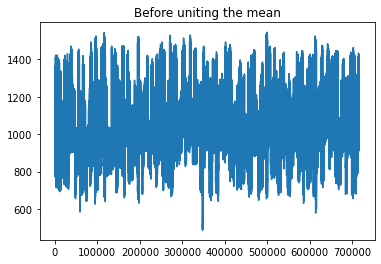

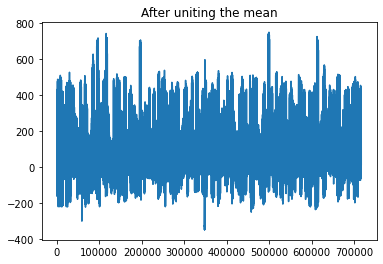

In [5]:
plt.plot(data_NSR_train)
plt.title("Before uniting the mean")
plt.show()
plt.plot(NSR_train_reduced)
plt.title("After uniting the mean")
plt.show()

In [6]:
# 差分
NSRDiff = copy.deepcopy(data_NSR_train)
for i in range(nSamplesNSR):
    for j in range(sample_len):
        if j == 0:
            NSRDiff[i * sample_len + j] = 0
        else:
            NSRDiff[i * sample_len + j] = (data_NSR_train[i * sample_len + j] 
                                           - data_NSR_train[i * sample_len + j - 1])
            
# NSR test
NSRTestDiff = copy.deepcopy(data_NSR_test)
for i in range(nSamplesNSRTest):
    for j in range(sample_len):
        if j == 0:
            NSRTestDiff[i * sample_len + j] = 0
        else:
            NSRTestDiff[i * sample_len + j] = (data_NSR_test[i * sample_len + j] 
                                           - data_NSR_test[i * sample_len + j - 1])

# AFib test
AFibDiff = copy.deepcopy(data_AFib_test)
for i in range(nSamplesAFib):
    for j in range(sample_len):
        if j == 0:
            AFibDiff[i * sample_len + j] = 0
        else:
            AFibDiff[i * sample_len + j] = (data_AFib_test[i * sample_len + j] 
                                           - data_AFib_test[i * sample_len + j - 1])

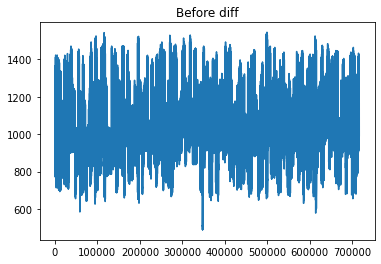

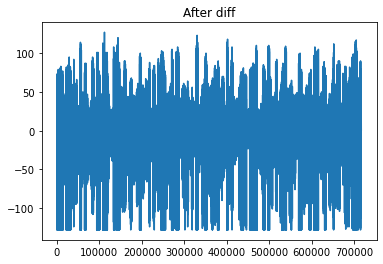

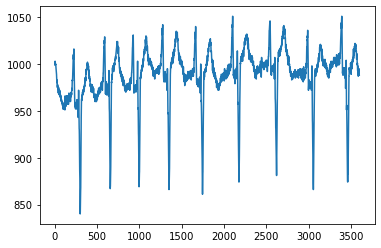

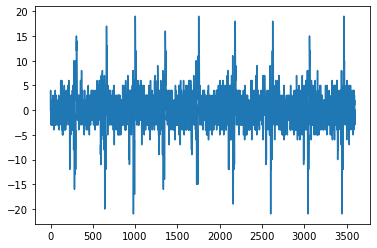

In [7]:
plt.plot(data_NSR_train)
plt.title("Before diff")
plt.show()
plt.plot(NSRDiff)
plt.title("After diff")
plt.show()
i = 21
data = data_NSR_train[i * sample_len 
                          : (i + 1) * sample_len]
plt.plot(data)
plt.show()
data = NSRDiff[i * sample_len 
                          : (i + 1) * sample_len]
plt.plot(data)
plt.show()

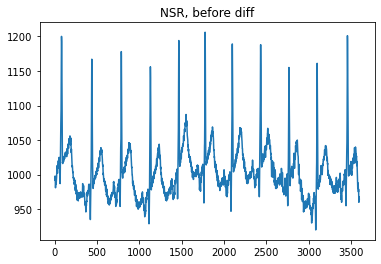

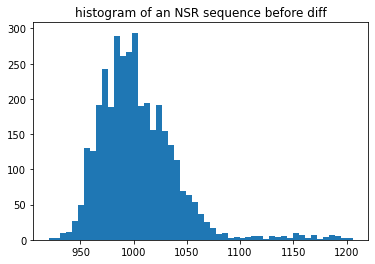

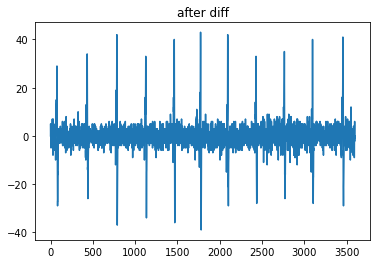

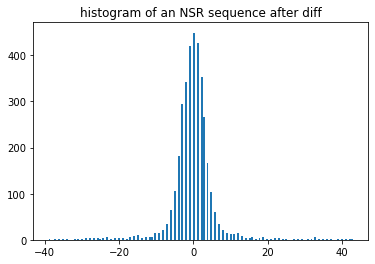

In [8]:
# graph the same sample sequence before and after 差分
i = 41
# before diff
data_plt = data_NSR_train[i * sample_len 
                          : (i + 1) * sample_len]
plt.plot(data_plt)
plt.title('NSR, before diff')
plt.show()
plt.hist(data_plt, bins = 'auto')
plt.title('histogram of an NSR sequence before diff')
plt.show()
# after diff
data_plt = NSRDiff[i * sample_len
                          : (i + 1) * sample_len]
plt.plot(data_plt)
plt.title('after diff')
plt.show()
plt.hist(data_plt, bins = 'auto')
plt.title('histogram of an NSR sequence after diff')
plt.show()

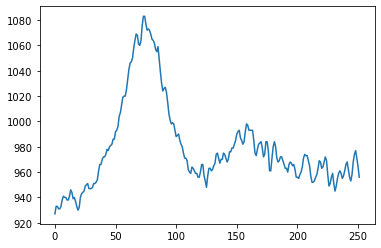

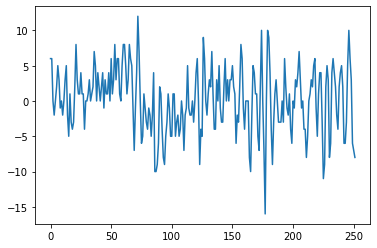

In [9]:
# take a closer look at one sample sequence
i = 39
# before diff
data_plt = data_NSR_train[int((i + 0.04) * sample_len) : int((i + 0.11) * sample_len)]
plt.plot(data_plt)
plt.show()
# after diff
data_plt = NSRDiff[int((i + 0.04) * sample_len) : int((i + 0.11) * sample_len)]
plt.plot(data_plt)
plt.show()

In [10]:
#train hmm for ECG dataset after 零均值化
nComponents = 16
ECG_HMM_r = hmm.GaussianHMM(n_components=nComponents,
                            covariance_type='full',
                            n_iter=10, init_params='smcw')
transMat = np.zeros((nComponents, nComponents))
for i in range(len(transMat)):
    for j in range(len(transMat[i])):
        if j == i or j == i + 1:
            transMat[i][j] = 0.5
transMat[nComponents - 1][0] = 0.5
ECG_HMM_r.transmat_ = transMat
ECG_HMM_r.fit(NSR_train_reduced.reshape(-1,1), lengths = data_NSR_train_len)

KeyboardInterrupt: 

In [ ]:
score_NSR = []
score_AFib = []
score_PVC = []
for i in range(len(NSR_test) + 1):
    data = NSR_test_reduced[i * data_NSR_test_len[i]:(i + 1) * data_NSR_test_len[i]]
    score_NSR.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(AFib_test) + 1):
    data = AFib_test_reduced[i * data_AFib_test_len[i]:(i + 1) * data_AFib_test_len[i]]
    score_AFib.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
for i in range(len(PVC_test) + 1):
    data = PVC_test_reduced[i * data_PVC_test_len[i]:(i + 1) * data_PVC_test_len[i]]
    score_PVC.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))

In [ ]:
plt.plot(score_NSR[:], ".-", label="dataset NSR", color = 'r')
plt.plot(score_AFib[:], ".-", label="dataset AFib", color = 'b')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 3")
plt.legend()
plt.show()

_ = plt.hist(score_NSR[:], bins = 'auto')
plt.title("normal ")
plt.show()
_ = plt.hist(score_AFib[:], bins = 'auto')
plt.show()

In [11]:
#train hmm for ECG dataset after diff
nComponents = 9
ECG_HMM_d = hmm.GaussianHMM(n_components=nComponents,
                            covariance_type='full',
                            n_iter=10, init_params='smcw')
transMat = np.zeros((nComponents, nComponents))
for i in range(len(transMat)):
    for j in range(len(transMat[i])):
        if j == i or j == i + 1:
            transMat[i][j] = 0.5
transMat[nComponents - 1][0] = 0.5
ECG_HMM_d.transmat_ = transMat
ECG_HMM_d.fit(NSRDiff.reshape(-1,1), lengths = data_NSR_train_len)

GaussianHMM(covariance_type='full', init_params='smcw', n_components=9)

In [13]:
# test the model
score_NSR = []
score_AFib = []
for i in range(len(NSR_test) + 1):
    data = NSR_test_reduced[i * data_NSR_test_len[i]:(i + 1) * data_NSR_test_len[i]]
    score_NSR.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(AFib_test) + 1):
    data = AFib_test_reduced[i * data_AFib_test_len[i]:(i + 1) * data_AFib_test_len[i]]
    score_AFib.append(ECG_HMM_r.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))

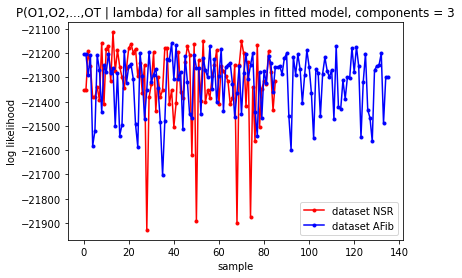

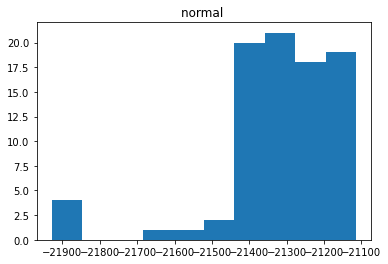

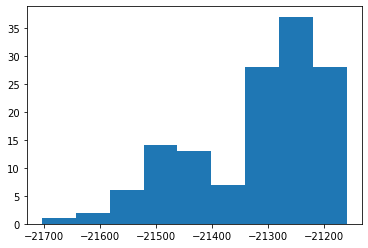

In [14]:
# plot score result
plt.plot(score_NSR[:], ".-", label="dataset NSR", color = 'r')
plt.plot(score_AFib[:], ".-", label="dataset AFib", color = 'b')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 3")
plt.legend()
plt.show()

_ = plt.hist(score_NSR[:], bins = 'auto')
plt.title("normal ")
plt.show()
_ = plt.hist(score_AFib[:], bins = 'auto')
plt.show()